In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.shape

(10841, 13)

# Data Cleaning

In [5]:
#No. of null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#Having Rating column as dependent columns, it is not good idea to fill up null value it may result into low accuracy 
df.dropna(subset=['Rating'], inplace=True)

In [7]:
df.shape

(9367, 13)

In [8]:
df.drop(["Current Ver","Android Ver","Last Updated"],axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


1. Category

In [9]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
#Check the record.
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#Here Category and Rating column has false value, best way is to drop it
df = df.drop(i)

In [12]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

2. Review

In [13]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

In [15]:
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

3. Size

In [16]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [17]:
#df['Size']=df.Size.apply(lambda x: x.replace('Varies with device','Nan'))
lists = []
for i in df["Size"]:
    if 'M' in i:
        i = float(i.replace('M',''))
        i = i*1000000
        lists.append(i)
    elif 'k' in i:
        i = float(i.replace('k',''))
        i = i*1000
        lists.append(i)
    else:
        lists.append("Unknown")
    
k = pd.Series(lists)
median = k[k!="Unknown"].median()
k = [median if i=="Unknown" else i for i in k]
df["Size"] = k

del k,median,lists

In [18]:
df.Size.value_counts()

14000000.0    1803
12000000.0     161
11000000.0     160
15000000.0     159
13000000.0     157
25000000.0     137
17000000.0     131
19000000.0     129
21000000.0     120
24000000.0     118
16000000.0     117
20000000.0     115
26000000.0     110
18000000.0     108
23000000.0     106
10000000.0     102
22000000.0      98
27000000.0      88
28000000.0      77
37000000.0      75
33000000.0      71
35000000.0      70
30000000.0      69
29000000.0      69
31000000.0      66
3300000.0       63
40000000.0      58
46000000.0      57
44000000.0      57
48000000.0      56
              ... 
371000.0         1
412000.0         1
429000.0         1
717000.0         1
728000.0         1
103000.0         1
454000.0         1
695000.0         1
613000.0         1
27000.0          1
957000.0         1
93000.0          1
500000.0         1
48000.0          1
55000.0          1
924000.0         1
473000.0         1
470000.0         1
842000.0         1
629000.0         1
460000.0         1
280000.0    

4. Installs

In [19]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [20]:
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace(',', '')

# Convert to numeric type
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [21]:
df['Installs'].value_counts()


1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

5. Type

In [22]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [23]:
print(df["Type"].value_counts())

Free    8719
Paid     647
Name: Type, dtype: int64


In [24]:
#convert categorical variable into numeric variables.
df.Type = df.Type.map({'Free':0,"Paid":1})
#we can also use get_dummies()3

6. Price

In [25]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [26]:
df['Price'] = df['Price'].apply(lambda x: x*75)

In [27]:
df["Price"].unique()

array([    0.  ,   374.25,   299.25,   524.25,   599.25,   449.25,
         224.25,   261.75,   149.25,   749.25,   561.75,    74.25,
         675.  ,   411.75,   750.  ,  1874.25,   899.25,  5999.25,
        1274.25,  1124.25,  2249.25,   974.25,   186.75,   824.25,
         112.5 ,  1499.25,  1199.25,  2549.25,  2999.25,   296.25,
         336.75,   127.5 ,   674.25,   111.75,   291.  , 29999.25,
        1349.25, 30000.  ,   226.5 ,   132.  ,   363.  ,   357.75,
         120.75,   187.5 ,   119.25,   486.75,    96.75, 22499.25,
       28499.25,  2849.25,  1424.25, 29249.25,   636.75,   131.25,
        1050.  ,   150.  ,   231.  ,   194.25,  1455.  ,   292.5 ,
         344.25,  1159.5 ,   228.  ,  1049.25,   321.75,   246.  ,
         345.  ,    75.  ,   221.25,   217.5 ,   147.75,   192.  ,
          90.  ])

In [28]:
#check for the duplicated data based on the column APP name
df[df.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,14000000.0,5000000,0,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,14000000.0,10000000,0,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,14000000.0,5000000,0,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000.0,10000000,0,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,14000000.0,1000000,0,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,14000000.0,10000000,0,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14000000.0,50000,0,0.0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20000000.0,5000000,0,0.0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,14000000.0,5000000,0,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,14000000.0,5000000,0,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


Duplicate Values

In [29]:
#Drop the duplicates based on the app names
df = df.drop_duplicates(keep='last',subset=['App'])

In [30]:
df.shape

(8196, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
App               8196 non-null object
Category          8196 non-null object
Rating            8196 non-null float64
Reviews           8196 non-null int64
Size              8196 non-null float64
Installs          8196 non-null int64
Type              8196 non-null int64
Price             8196 non-null float64
Content Rating    8196 non-null object
Genres            8196 non-null object
Last Updated      8196 non-null object
Current Ver       8192 non-null object
Android Ver       8194 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 896.4+ KB


Remove unnecessary columns

In [32]:
df.drop(['Genres','Last Updated','Current Ver','Android Ver'], axis = 1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,Everyone
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,0,0.0,Everyone
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,0,0.0,Everyone
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,0,0.0,Everyone
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,0,0.0,Everyone
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,0,0.0,Everyone
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000000.0,1000000,0,0.0,Everyone


# Data Visualization

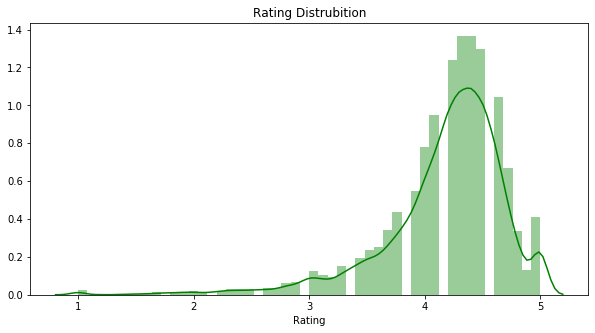

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['Rating'],color='g');
plt.title("Rating Distrubition")
plt.show()

([<matplotlib.patches.Wedge at 0x22f7460ab38>,
 [Text(-1.0708443041658626, 0.25157995992433474, 'Free'),
  Text(1.0708443159431693, -0.2515799097944944, 'Paid')],
 [Text(-0.5840968931813795, 0.13722543268600076, '92.7%'),
  Text(0.584096899605365, -0.13722540534245148, '7.3%')])

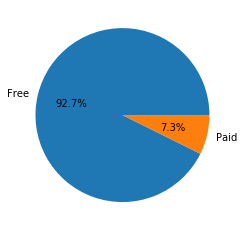

In [34]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

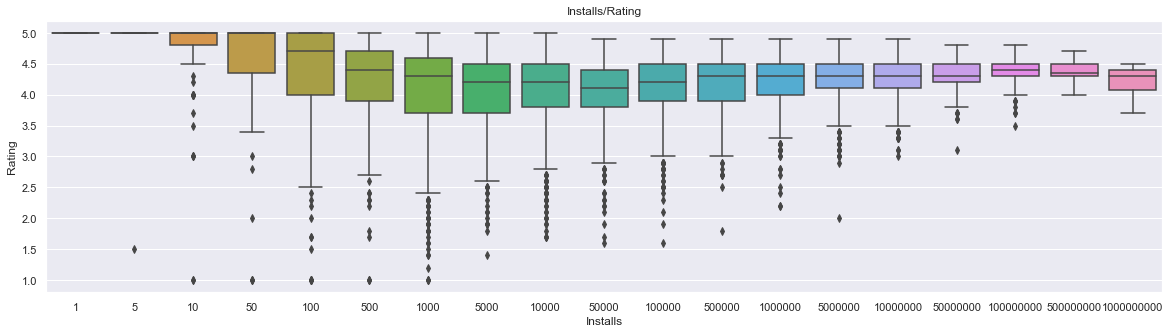

In [35]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(20,5))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=df)
plt.title("Installs/Rating")

plt.show()

The most costly App

In [36]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,1,30000.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


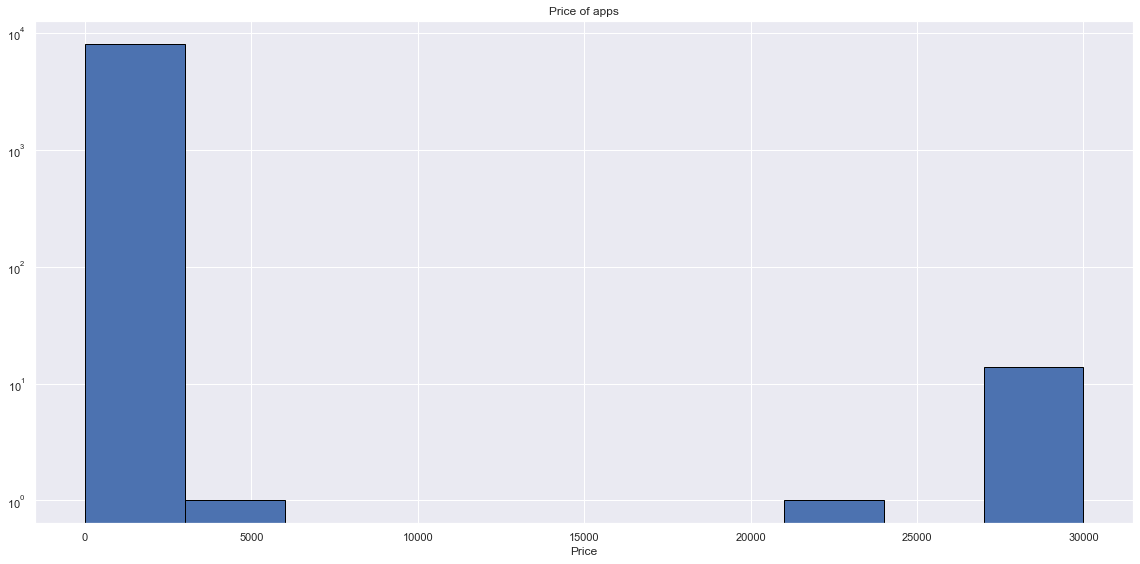

In [37]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(df['Price'],edgecolor = 'black', log=True)
plt.title("Price of apps")
plt.xlabel('Price')
plt.tight_layout()

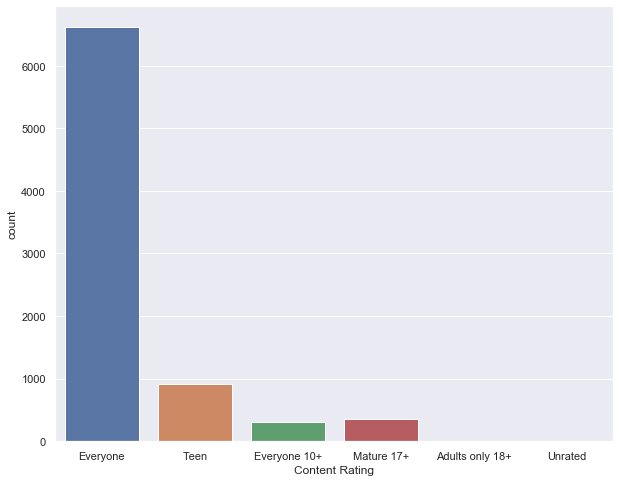

In [38]:
plt.figure(figsize = (10,8))
sns.countplot(df['Content Rating'])
plt.show()

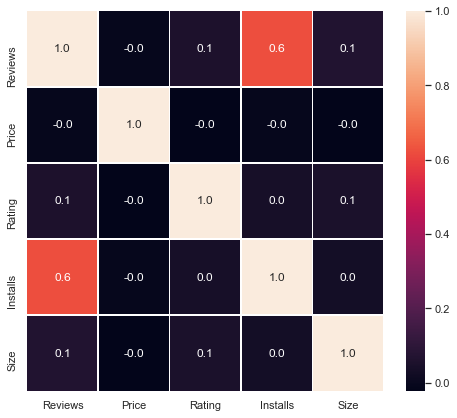

In [39]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(df[["Reviews","Price","Rating","Installs","Size"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

Installs and Reviews has high corelation

Text(0.5, 1.0, 'Total apps of each Category')

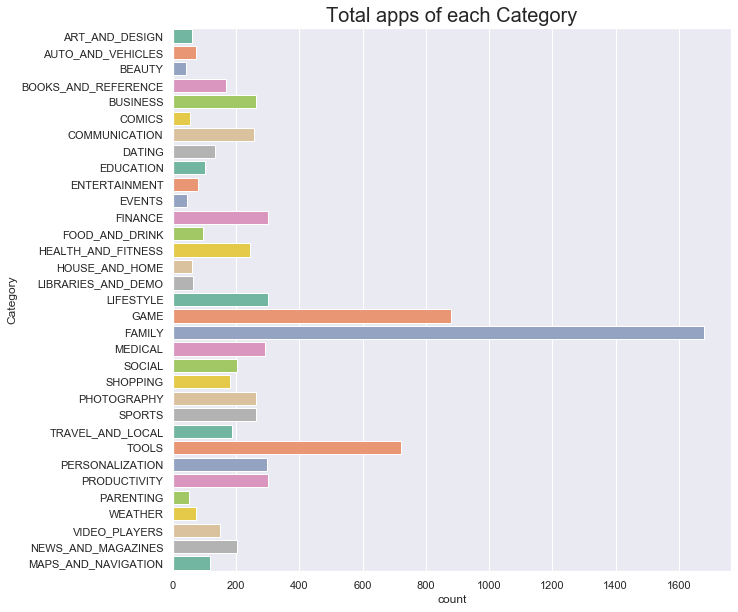

In [40]:
plt.figure(figsize=(10,10))
g = sns.countplot(y="Category",data=df, palette = "Set2")
plt.title('Total apps of each Category',size = 20)

We can see that Family, Game and Tools are the most frequent Categories in our dataset.

Convert Ratings to two categories
1. High (3.5 - 5.0)
2. Low (<3.5)

In [41]:
Rating_cat = dict()
for i in range(0,len(df['Rating'])):
    if df['Rating'].iloc[i] >= 3.5:
        Rating_cat[i] = 'High'
    else: Rating_cat[i] = 'Low'
        
#Add the categorical column to the data 
df = df.assign(Rating_cat = pd.Series(Rating_cat).values)

In [42]:
df['Rating_cat'].value_counts()

High    7479
Low      717
Name: Rating_cat, dtype: int64

In [43]:
df = df.drop(['Rating'], axis = 1)

#To encode the Ratings labels for learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rating_cat'] = le.fit_transform(df['Rating_cat'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 13 columns):
App               8196 non-null object
Category          8196 non-null object
Reviews           8196 non-null int64
Size              8196 non-null float64
Installs          8196 non-null int64
Type              8196 non-null int64
Price             8196 non-null float64
Content Rating    8196 non-null object
Genres            8196 non-null object
Last Updated      8196 non-null object
Current Ver       8192 non-null object
Android Ver       8194 non-null object
Rating_cat        8196 non-null int32
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 864.4+ KB


In [45]:
df = pd.get_dummies(df, columns= ['Category'])
print(df.columns)

Index(['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating',
       'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Rating_cat',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_

In [46]:
    df.head()

,App,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,19000000.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700000.0,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,215644,25000000.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,967,2800000.0,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,0,0,0,0,0
5,Paper flowers instructions,167,5600000.0,50000,0,0.0,Everyone,Art & Design,"March 26, 2017",1.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
inputs = df.drop(labels =['Rating_cat','App','Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], axis = 1)
target = df['Rating_cat']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [49]:
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
D=(model.score(X_test,y_test))*100
D

84.8170731707317

In [51]:
# predictions = model.predict(X_test)

In [52]:
decision_result=model.score(X_test,y_test)

In [53]:
forest = RandomForestClassifier(n_estimators=10, max_depth = 10, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(inputs, target,test_size=0.20)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [54]:
# predictions = forest.predict(X_test)

In [55]:
RF=(forest.score(X_test, y_test))*100
RF

92.31707317073172

# Conclusions
* There is Corelation between Rating & Installs.
* Family, Game and Tools are the most frequent Categories in our dataset.
* Most of Application are free.
* Highest Rating is between 4-5.
* Ratings change slightly as category of the application changes.
* Installs increases, we can see that Rating gets higher values.
* People are tend to vote higher when they pay for it.
